# Energy Safe Victoria Data Exercise

#### Candidate Name: Mark Jose


Date:  18 Feb 2019
 
Version: 1

Environment: R 3.5.1 and Jupyter notebook

This is a simple Data Exercise for my application as a Data Scientist in Energy Safe Victoria. 

It assesses three things: 
<br/> 1) checking the data quality by looking at the missing values
<br/> 2) calculating and reporting the correlation of the weather factors, and 
<br/> 3) creating and interpreting a basic model to predict the number of incidents in 2018.

The libraries I've used are the following:
- **DataExplorer** for a quick exploratory data analysis
- **ggplot** for miscellanous data plots
- **reshape2** for melting the data frames

Note that this exercise is done within a day so assumptions and shortcuts were made. 

In [4]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17134)

Matrix products: default

locale:
[1] LC_COLLATE=English_Australia.1252  LC_CTYPE=English_Australia.1252   
[3] LC_MONETARY=English_Australia.1252 LC_NUMERIC=C                      
[5] LC_TIME=English_Australia.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.1  magrittr_1.5    IRdisplay_0.5.0 pbdZMQ_0.3-3   
 [5] tools_3.5.1     htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4   
 [9] Rcpp_0.12.18    uuid_0.1-2      stringi_1.2.4   IRkernel_0.8.12
[13] jsonlite_1.5    stringr_1.3.1   digest_0.6.15   repr_0.15.0    
[17] evaluate_0.11  

In [6]:
library.path <- .libPaths()
print(.libPaths())

[1] "C:/Users/mrkjse/Anaconda2/Lib/R/library"


In [7]:
install.packages('DataExplorer', repos='http://cran.us.r-project.org', lib = library.path)

package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mrkjse\AppData\Local\Temp\RtmpktOitP\downloaded_packages


In [8]:
library(DataExplorer, lib.loc = library.path)
library(ggplot2)

Warning message:
"package 'DataExplorer' was built under R version 3.5.2"

In [56]:
list.files()

[1] "~$ta exercise.docx"                    
 [2] "data exercise.docx"                    
 [3] "DC02D_Data_077094_999999999520317.txt" 
 [4] "DC02D_Data_079100_999999999520317.txt" 
 [5] "DC02D_Data_081125_999999999520317.txt" 
 [6] "DC02D_Data_085280_999999999520317.txt" 
 [7] "DC02D_Data_086282_999999999520317.txt" 
 [8] "DC02D_Data_090186_999999999520317.txt" 
 [9] "DC02D_Notes_999999999520317.txt"       
[10] "DC02D_StnDet_999999999520317.txt"      
[11] "Energy Safe Victoria - Mark Jose.ipynb"
[12] "Energy Safe Victoria.ipynb"            
[13] "try.csv"                               
[14] "weather_and_incident_count.csv"

# Importing the Data

Importing the data uses the `read_csv()` method. The data will be explored later.

In [57]:
st077094 <- read.csv('DC02D_Data_077094_999999999520317.txt')
st079100 <- read.csv('DC02D_Data_079100_999999999520317.txt')
st081125 <- read.csv('DC02D_Data_081125_999999999520317.txt')
st085280 <- read.csv('DC02D_Data_085280_999999999520317.txt')
st086282 <- read.csv('DC02D_Data_086282_999999999520317.txt')
st090186 <- read.csv('DC02D_Data_090186_999999999520317.txt')

Read the other supplementary data like the station information and the incident report

In [58]:
stndet <- read.csv('DC02D_StnDet_999999999520317.txt')
weainccount <- read.csv('weather_and_incident_count.csv')

Let's take a look at some of the data contents by checking its head. We can also take a look at what the columns of the data are made of.

In [59]:
head(st085280)

dc,Station.Number,Day.Month.Year.in.DD.MM.YYYY.format,Precipitation.in.the.24.hours.before.9am..local.time..in.mm,Quality.of.precipitation.value,Number.of.days.of.rain.within.the.days.of.accumulation,Accumulated.number.of.days.over.which.the.precipitation.was.measured,Evaporation.in.24.hours.before.9am..local.time..in.mm,Quality.of.evaporation.in.24.hours.before.9am..local.time.,Days.of.accumulation.for.evaporation,...,Quality.of.wind.direction.at.15.hours.Local.Time,Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa,Quality.of.mean.sea.level.pressure.at.09.hours.Local.Time,Mean.sea.level.pressure.at.15.hours.Local.Time.in.hPa,Quality.of.mean.sea.level.pressure.at.15.hours.Local.Time,Total.cloud.amount.at.09.hours.in.eighths,Quality.of.total.cloud.amount.at.09.hours.Local.Time,Total.cloud.amount.at.15.hours.in.eighths,Quality.of.total.cloud.amount.at.15.hours.Local.Time,X.
dc,85280,01/01/2010,1.6,N,NA,1,NA,NA,NA,...,Y,1009.2,Y,1008.6,Y,4,Y,7,Y,#
dc,85280,02/01/2010,5.0,N,NA,1,NA,NA,NA,...,Y,1009.8,Y,1010.7,Y,8,Y,6,Y,#
dc,85280,03/01/2010,0.2,N,NA,1,NA,NA,NA,...,Y,1018.4,Y,1018.2,Y,8,Y,7,Y,#
dc,85280,04/01/2010,0.0,N,NA,1,NA,NA,NA,...,Y,1018.9,Y,1015.1,Y,2,Y,3,Y,#
dc,85280,05/01/2010,0.0,N,NA,1,NA,NA,NA,...,Y,1013.8,Y,1012.6,Y,NA,,6,Y,#
dc,85280,06/01/2010,0.0,N,NA,1,NA,NA,NA,...,Y,1018.3,Y,1016.6,Y,8,Y,6,Y,#


In [60]:
str(st085280)

'data.frame':	3056 obs. of  49 variables:
 $ dc                                                                                : Factor w/ 1 level "dc": 1 1 1 1 1 1 1 1 1 1 ...
 $ Station.Number                                                                    : int  85280 85280 85280 85280 85280 85280 85280 85280 85280 85280 ...
 $ Day.Month.Year.in.DD.MM.YYYY.format                                               : Factor w/ 3056 levels "01/01/2010","01/01/2011",..: 1 102 203 304 405 506 607 708 809 910 ...
 $ Precipitation.in.the.24.hours.before.9am..local.time..in.mm                       : num  1.6 5 0.2 0 0 0 0 0 0 0 ...
 $ Quality.of.precipitation.value                                                    : Factor w/ 2 levels " ","N": 2 2 2 2 2 2 2 2 2 2 ...
 $ Number.of.days.of.rain.within.the.days.of.accumulation                            : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Accumulated.number.of.days.over.which.the.precipitation.was.measured              : int  1 1 1 1 1

I won't dabble much with exploring the contents of the data further, as it is comprehensively and nicely done in the accompanying data dictionary in the zip file included. Due to lack of time, I will assume that the viewer of this notebook is already familiar with the data and the data dictionary.

## Question 1
### Which station has the best data quality? And why?

In doing question 1, I have made an ocular inspection of the files before loading them into the Jupyter Notebook. Since the files does not have any format issues (for ex. no invalid data types, no unexpected values), I decided to just focus on the completeness of the station data.

An initial look at the files using the DataExplorer's `introduce()` function already gives us an idea on the best station.

In [61]:
cat("station 077094")
introduce(st077094)
cat("station 079100")
introduce(st079100)
cat("station 081125")
introduce(st081125)
cat("station 085280")
introduce(st085280)
cat("station 086282")
introduce(st086282)
cat("station 090186")
introduce(st090186)

station 077094

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
3056,49,24,19,6,22508,0,149744,973592


station 079100

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
3056,49,24,19,6,22784,0,149744,973448


station 081125

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
3056,49,24,19,6,23754,0,149744,973448


station 085280

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
3056,49,24,20,5,19861,0,149744,973376


station 086282

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
3056,49,26,23,0,3390,1107,149744,998768


station 090186

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
3056,49,24,19,6,22774,0,149744,973448


Based from the information given above, **station 086282 (MELBOURNE AIRPORT)** is the station with the best quality. <br/><br/>Why?
- It has no columns whose values are all missing.
- It has considerably less total_missing_values from the rest of the stations.
- It is the only station that features complete rows.  


In [62]:
stndet

Record.identifier,Bureau.of.Meteorology.Station.Number,Rainfall.district.code,Station.Name,Month.Year.site.opened...MM.YYYY.,Month.Year.site.closed...MM.YYYY.,Latitude.to.4.decimal.places.in.decimal.degrees,Longitude.to.4.decimal.places.in.decimal.degrees,Method.by.which.latitude.longitude.was.derived,State,...,WMO..World.Meteorological.Organisation..Index.Number,First.year.of.data.supplied.in.data.file,Last.year.of.data.supplied.in.data.file,Percentage.complete.between.first.and.last.records,Percentage.of.values.with.quality.flag..Y.,Percentage.of.values.with.quality.flag..N.,Percentage.of.values.with.quality.flag..W.,Percentage.of.values.with.quality.flag..S.,Percentage.of.values.with.quality.flag..I.,X
st,77094,77,SWAN HILL AERODROME,12/1996,NA,-35.3766,143.5416,GPS,VIC,...,94843,2010,2018,100,32,68,0,*,0,#
st,79100,79,HORSHAM AERODROME,10/1990,NA,-36.6697,142.1731,GPS,VIC,...,95839,2010,2018,100,33,67,0,*,0,#
st,81125,81,SHEPPARTON AIRPORT,05/1996,NA,-36.4289,145.3947,GPS,VIC,...,94875,2010,2018,99,33,67,0,*,*,#
st,85280,85,MORWELL (LATROBE VALLEY AIRPORT),01/1984,NA,-38.2094,146.4747,GPS,VIC,...,94891,2010,2018,100,32,68,0,*,0,#
st,86282,86,MELBOURNE AIRPORT,06/1970,NA,-37.6655,144.8321,GPS,VIC,...,94866,2010,2018,100,34,66,0,*,0,#
st,90186,90,WARRNAMBOOL AIRPORT NDB,09/1998,NA,-38.2867,142.4522,GPS,VIC,...,94837,2010,2018,100,31,69,0,*,0,#


A peak at the stations dataframe also solidifies the fact that **station 086282 (MELBOURNE AIRPORT)** is the station with the best quality data. It has the most Percentage.of.values.with.quality.flag..Y. (quality of data is ensured) and the least Percentage.of.values.with.quality.flag..N (quality of data might be problematic).

## Merging dataframes

Part of the assessment it seems is to be able to merge the table with incident_counts to the station weather readings tables. Since both tables have station names and dates, we could use it to perform a left join to add the incident_count in the weather readings data.

In [63]:
# Since this is gonna be one of the keys, ensure the date is properly parsed for both files.
a <- as.Date(st077094$'Day.Month.Year.in.DD.MM.YYYY.format', format = '%d/%m/%Y')
b <- as.Date(st079100$'Day.Month.Year.in.DD.MM.YYYY.format', format = '%d/%m/%Y')
c <- as.Date(st081125$'Day.Month.Year.in.DD.MM.YYYY.format', format = '%d/%m/%Y')
d <- as.Date(st085280$'Day.Month.Year.in.DD.MM.YYYY.format', format = '%d/%m/%Y')
e <- as.Date(st086282$'Day.Month.Year.in.DD.MM.YYYY.format', format = '%d/%m/%Y')
f <- as.Date(st090186$'Day.Month.Year.in.DD.MM.YYYY.format', format = '%d/%m/%Y')
 
z <- as.Date(weainccount$'date', format = '%d/%m/%Y')

In [64]:
# Check if there are NAs in the column to see if there's a conversion error.
anyNA(a)
anyNA(b)
anyNA(c)
anyNA(d)
anyNA(e)
anyNA(f)
anyNA(z)

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

In [65]:
# Since Station Number is also one of the keys, ensure that the values have no issues.
unique(st077094$'Station.Number')
unique(st079100$'Station.Number')
unique(st081125$'Station.Number')
unique(st085280$'Station.Number')
unique(st086282$'Station.Number')
unique(st090186$'Station.Number')

[1] 77094

[1] 79100

[1] 81125

[1] 85280

[1] 86282

[1] 90186

In [66]:
# Add the incident_count to the weather readings data.
st077094 <- merge(st077094, 
           weainccount, 
           by.x = c('Station.Number', 'Day.Month.Year.in.DD.MM.YYYY.format'), 
           by.y = c('station_number', 'date'), all.x = TRUE)

st079100 <- merge(st079100, 
           weainccount, 
           by.x = c('Station.Number', 'Day.Month.Year.in.DD.MM.YYYY.format'), 
           by.y = c('station_number', 'date'), all.x = TRUE)

st081125 <- merge(st081125, 
           weainccount, 
           by.x = c('Station.Number', 'Day.Month.Year.in.DD.MM.YYYY.format'), 
           by.y = c('station_number', 'date'), all.x = TRUE)

st085280 <- merge(st085280, 
           weainccount, 
           by.x = c('Station.Number', 'Day.Month.Year.in.DD.MM.YYYY.format'), 
           by.y = c('station_number', 'date'), all.x = TRUE)

st086282 <- merge(st086282, 
           weainccount, 
           by.x = c('Station.Number', 'Day.Month.Year.in.DD.MM.YYYY.format'), 
           by.y = c('station_number', 'date'), all.x = TRUE)

st090186 <- merge(st090186, 
           weainccount, 
           by.x = c('Station.Number', 'Day.Month.Year.in.DD.MM.YYYY.format'), 
           by.y = c('station_number', 'date'), all.x = TRUE)



# Question 2
## Which factors show the strong correlation? 

For this exercise, I will be limiting my correlation analysis to numerical variables only due to time constraints.

To check if there is a *linear relationship* between numerical variables, we need to compute for the **correlation coefficient**. R makes it easy for us by just calling the `cor()` function. A value of **1** implies heavy positive linear correlation, **-1** for heavy negative linear correlation, while a value close to **0** implies weak or no linear correlation.

But first, we need to eliminate non-numerical variables in the set. We could use both `lapply`, `is.numeric` to filter out non-numeric values in the dataframe.

In [67]:
all_records <- rbind(st077094, st079100, st081125, st085280, st086282, st090186)

# Replace NA incident_count with 0 (an assumption).
all_records$incident_count[is.na(all_records$incident_count)] <- 0

introduce(all_records)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
18336,50,26,24,0,115071,1107,916800,5020624


In [68]:
nums <- unlist(lapply(all_records, is.numeric))
which(nums == TRUE)

Station.Number 
                                                                                 1 
                       Precipitation.in.the.24.hours.before.9am..local.time..in.mm 
                                                                                 4 
                            Number.of.days.of.rain.within.the.days.of.accumulation 
                                                                                 6 
              Accumulated.number.of.days.over.which.the.precipitation.was.measured 
                                                                                 7 
                             Evaporation.in.24.hours.before.9am..local.time..in.mm 
                                                                                 8 
                                              Days.of.accumulation.for.evaporation 
                                                                                10 
               Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C 
                                                                                11 
                                       Days.of.accumulation.of.maximum.temperature 
                                                                                13 
              Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C 
                                                                                14 
                                       Days.of.accumulation.of.minimum.temperature 
                                                                                16 
                   Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C 
                                                                                17 
                   Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C 
                                                                                19 
          Relative.humidity.for.observation.at.09.hours.Local.Time.in.percentage.. 
                                                                                21 
          Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage.. 
                                                                                23 
Number.of.hours.of.bright.sunshine.in.the.24.hours.midnight.to.midnight.Local.Time 
                                                                                25 
                                                Speed.of.maximum.wind.gust.in.km.h 
                                                                                27 
                                    Time.of.maximum.wind.gust.in.HHMI.24.hour.mode 
                                                                                31 
                                Wind.speed.at.09.hours.Local.Time.measured.in.km.h 
                                                                                33 
                                Wind.speed.at.15.hours.Local.Time.measured.in.km.h 
                                                                                35 
                             Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa 
                                                                                41 
                             Mean.sea.level.pressure.at.15.hours.Local.Time.in.hPa 
                                                                                43 
                                         Total.cloud.amount.at.09.hours.in.eighths 
                                                                                45 
                                         Total.cloud.amount.at.15.hours.in.eighths 
                                                                                47 
                                                                    incident_count 
                                                                                50

In [69]:
# Remove non-numeric columns
all_records <- all_records[,which(nums == TRUE)]

The function `cor()` computes for the Pearson Correlation, and to do this we need to only consider the complete observations, hence the additional parameter `use = complete.obs`.

In [70]:
record_corr <- cor(all_records, use = 'complete.obs')

Warning message in cor(all_records, use = "complete.obs"):
"the standard deviation is zero"

In order to present the weather factors that are correlated with each other, I used the `melt()` function to convert the data into a wide format (i.e. pivoting) that will allow me to filter out correlation coefficient values.

In [71]:
record_corr[lower.tri(record_corr, diag = TRUE)] <- NA
library(reshape2)

# positive correlation
subset(melt(record_corr), value > .3)

,Var1,Var2,value
149,Evaporation.in.24.hours.before.9am..local.time..in.mm,Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C,0.4809154
197,Evaporation.in.24.hours.before.9am..local.time..in.mm,Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C,0.4983163
199,Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C,Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C,0.7642468
245,Evaporation.in.24.hours.before.9am..local.time..in.mm,Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C,0.5086495
247,Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C,Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C,0.8913835
249,Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C,Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C,0.9020288
269,Evaporation.in.24.hours.before.9am..local.time..in.mm,Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C,0.4173087
271,Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C,Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C,0.9674507
273,Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C,Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C,0.7145632
275,Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C,Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C,0.8386597


As an example, **Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C** and **Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C** have shown a positive linear correlation at 0.8913835. To better see this relationship, we can view the scatterplot of the two variables.

The scatterplot clearly shows that as the x variable increases, y variable increases as well.

Warning message:
"Removed 53 rows containing missing values (geom_point)."

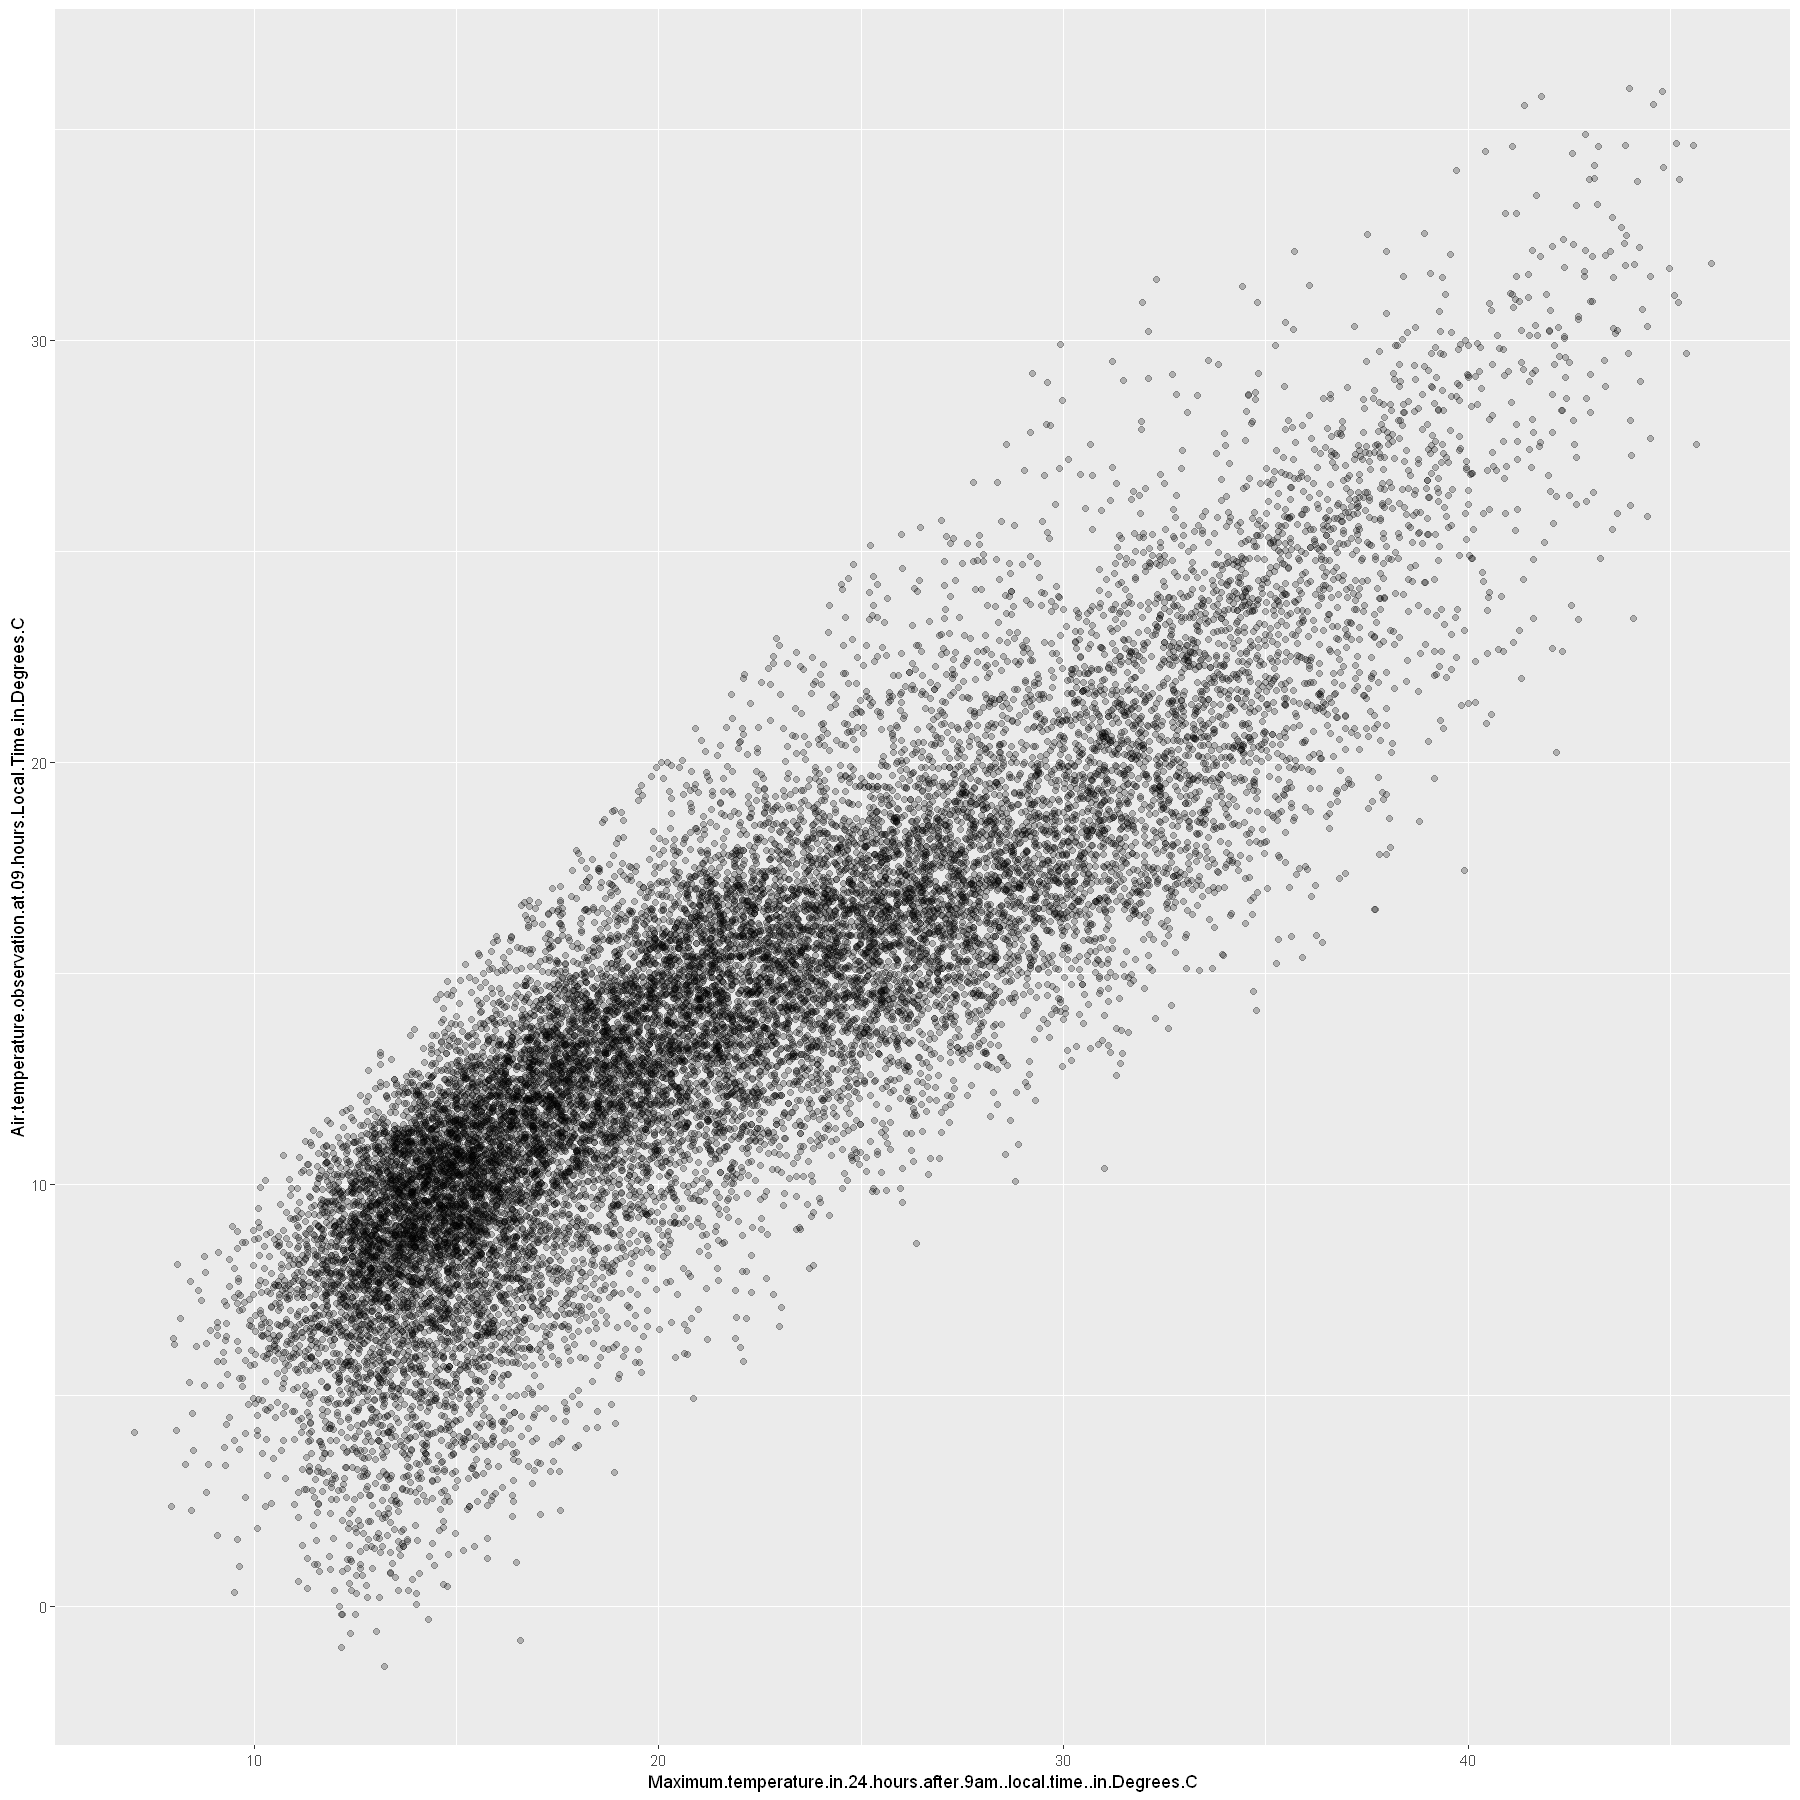

In [72]:
ggplot(aes(x = Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C, 
           y = Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C), data = all_records) + 
    geom_point(alpha=1/4, position = 'jitter') 

In [73]:
# negative correlation
subset(melt(record_corr), value < -.3)

,Var1,Var2,value
319,Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C,Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage..,-0.3809991
324,Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C,Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage..,-0.4606587
349,Relative.humidity.for.observation.at.09.hours.Local.Time.in.percentage..,Number.of.hours.of.bright.sunshine.in.the.24.hours.midnight.to.midnight.Local.Time,-0.4773277
350,Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage..,Number.of.hours.of.bright.sunshine.in.the.24.hours.midnight.to.midnight.Local.Time,-0.6944179
421,Relative.humidity.for.observation.at.09.hours.Local.Time.in.percentage..,Wind.speed.at.09.hours.Local.Time.measured.in.km.h,-0.3772278
461,Evaporation.in.24.hours.before.9am..local.time..in.mm,Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa,-0.3398657
465,Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C,Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa,-0.3873121
467,Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C,Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa,-0.3668185
472,Speed.of.maximum.wind.gust.in.km.h,Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa,-0.5383146
474,Wind.speed.at.09.hours.Local.Time.measured.in.km.h,Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa,-0.3639575


Looking at negative linear correlation, **Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage..** and **Number.of.hours.of.bright.sunshine.in.the.24.hours.midnight.to.midnight.Local.Time** has a value at -0.6944179. The scatterplot presents a hint of this inverse relationship, albeit subtly.

Warning message:
"Removed 15283 rows containing missing values (geom_point)."

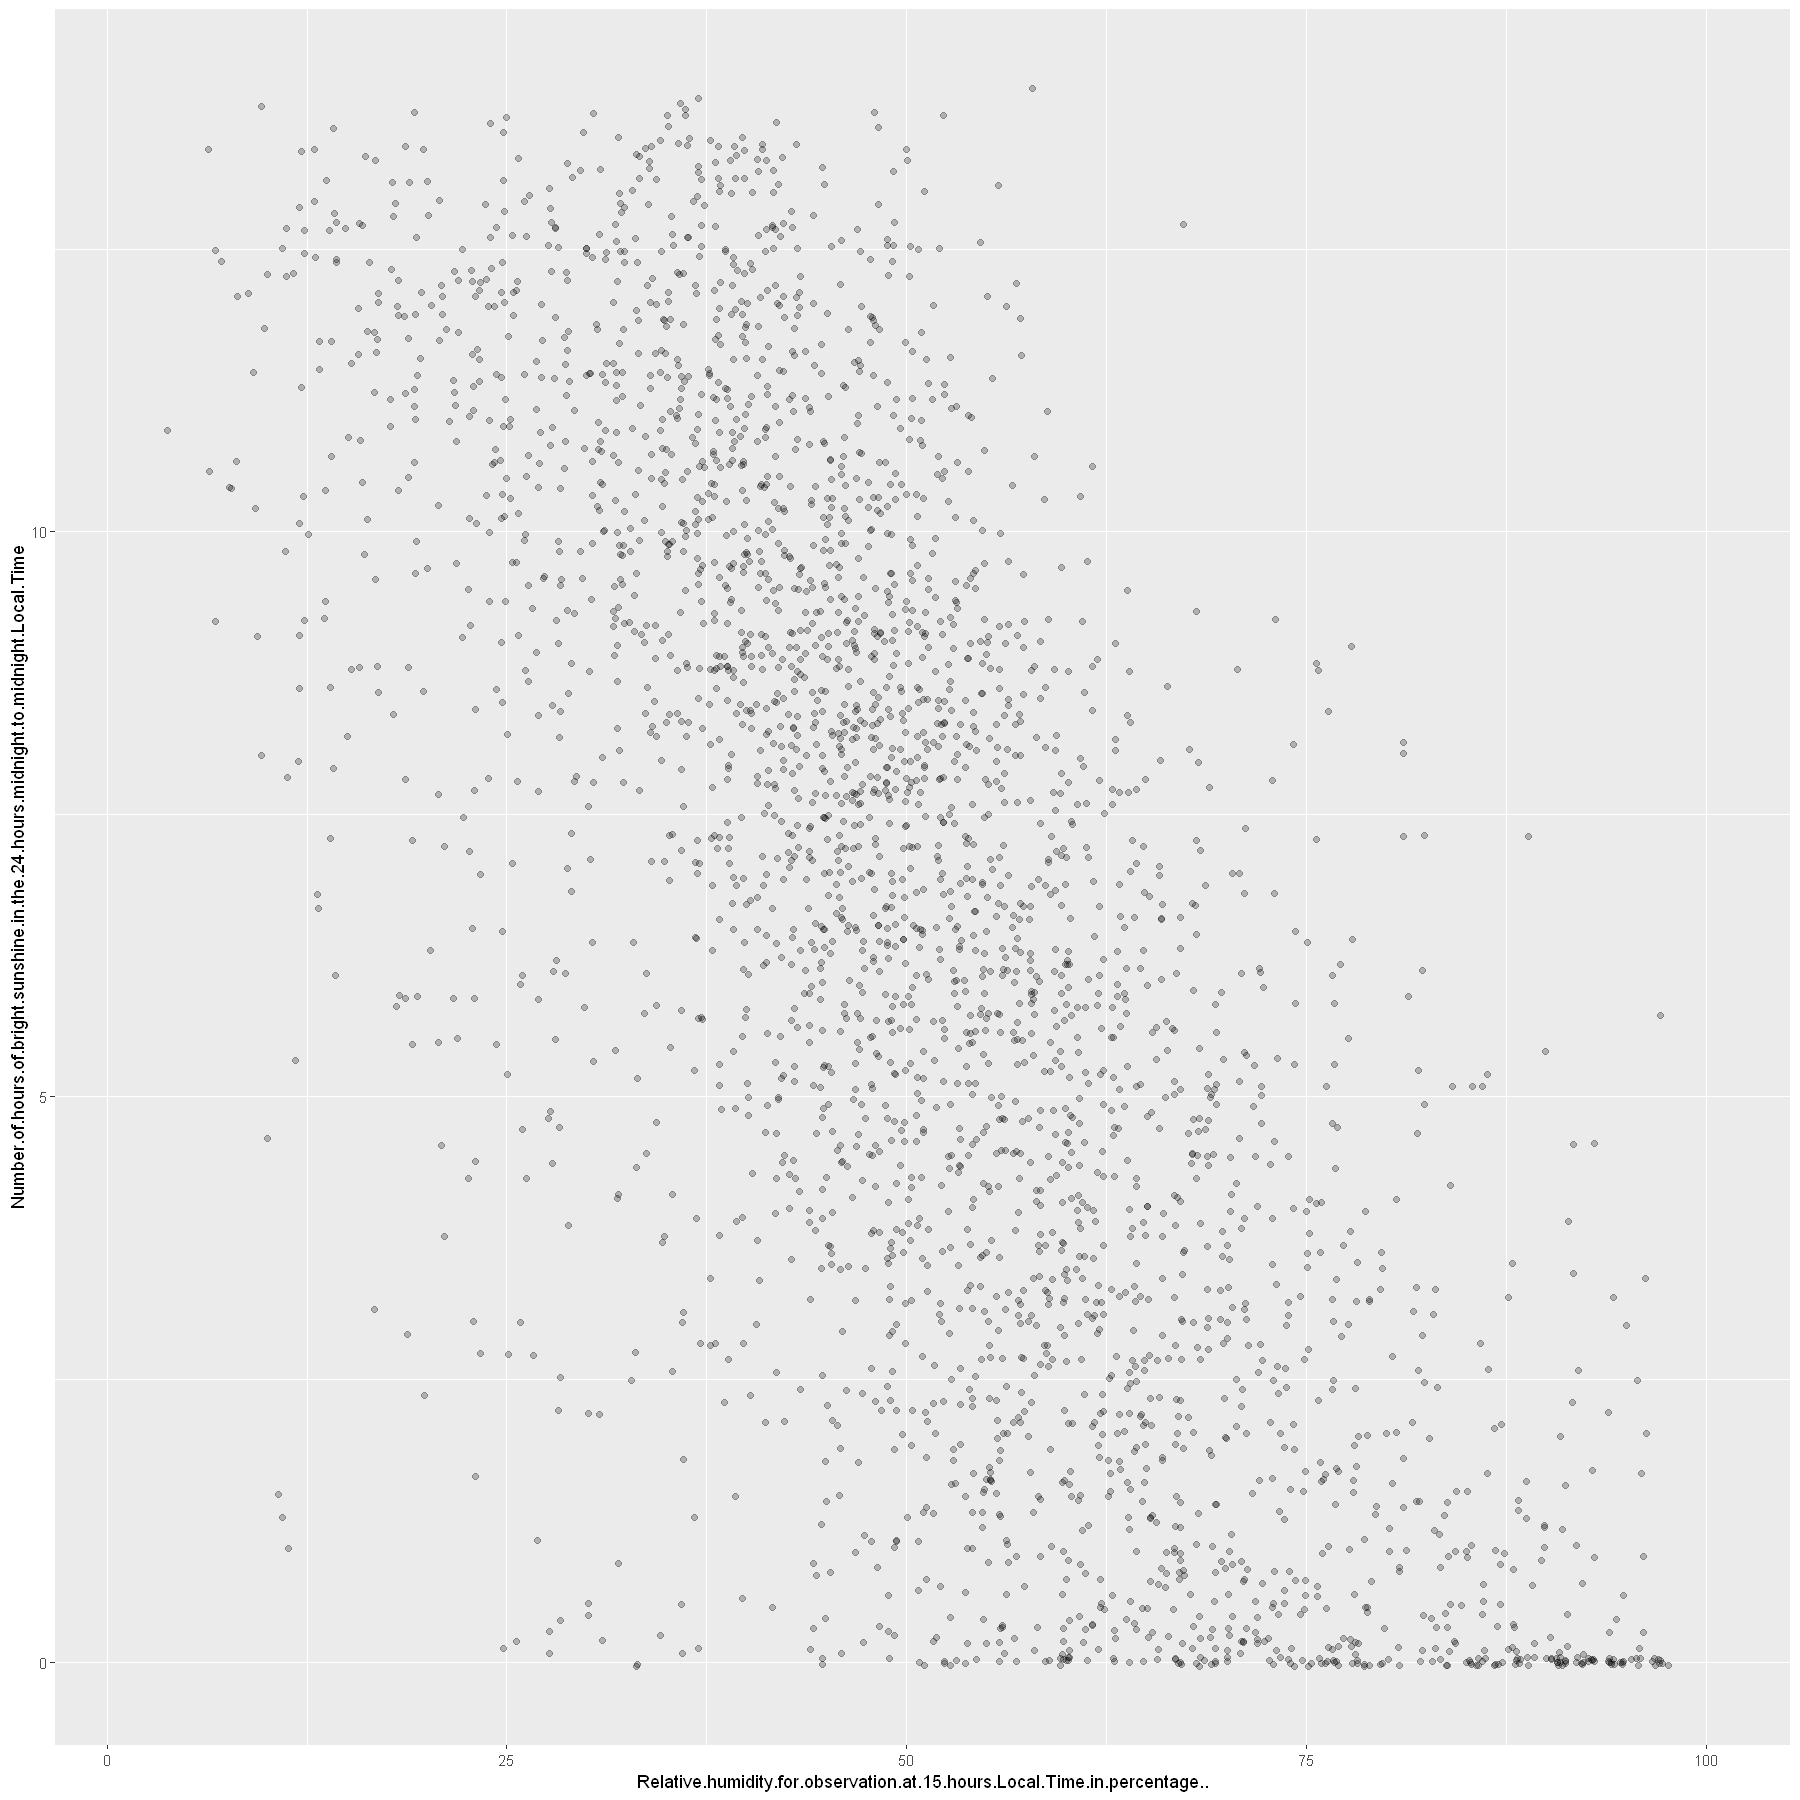

In [74]:
ggplot(aes(x = Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage.., 
           y = Number.of.hours.of.bright.sunshine.in.the.24.hours.midnight.to.midnight.Local.Time), data = all_records) + 
    geom_point(alpha=1/4, position = 'jitter') 

To get a quick overview of the correlation of the numerical variables, we could also do a heath map using DataExplorer's `plot_correlation` function. 

Negative correlation shows the cell in the shade of <font color= 'blue'>blue</font>, with the darkest as the most inversely correlated.
<br/>Positive correlation shows the cell in the shade of <font color = 'red'>red</font>, with the darkest as the most linearly correlated.

In [75]:
options(repr.plot.width=15, repr.plot.height=15)

Warning message in cor(x = structure(list(Station.Number = c(86282L, 86282L, 86282L, :
"the standard deviation is zero"

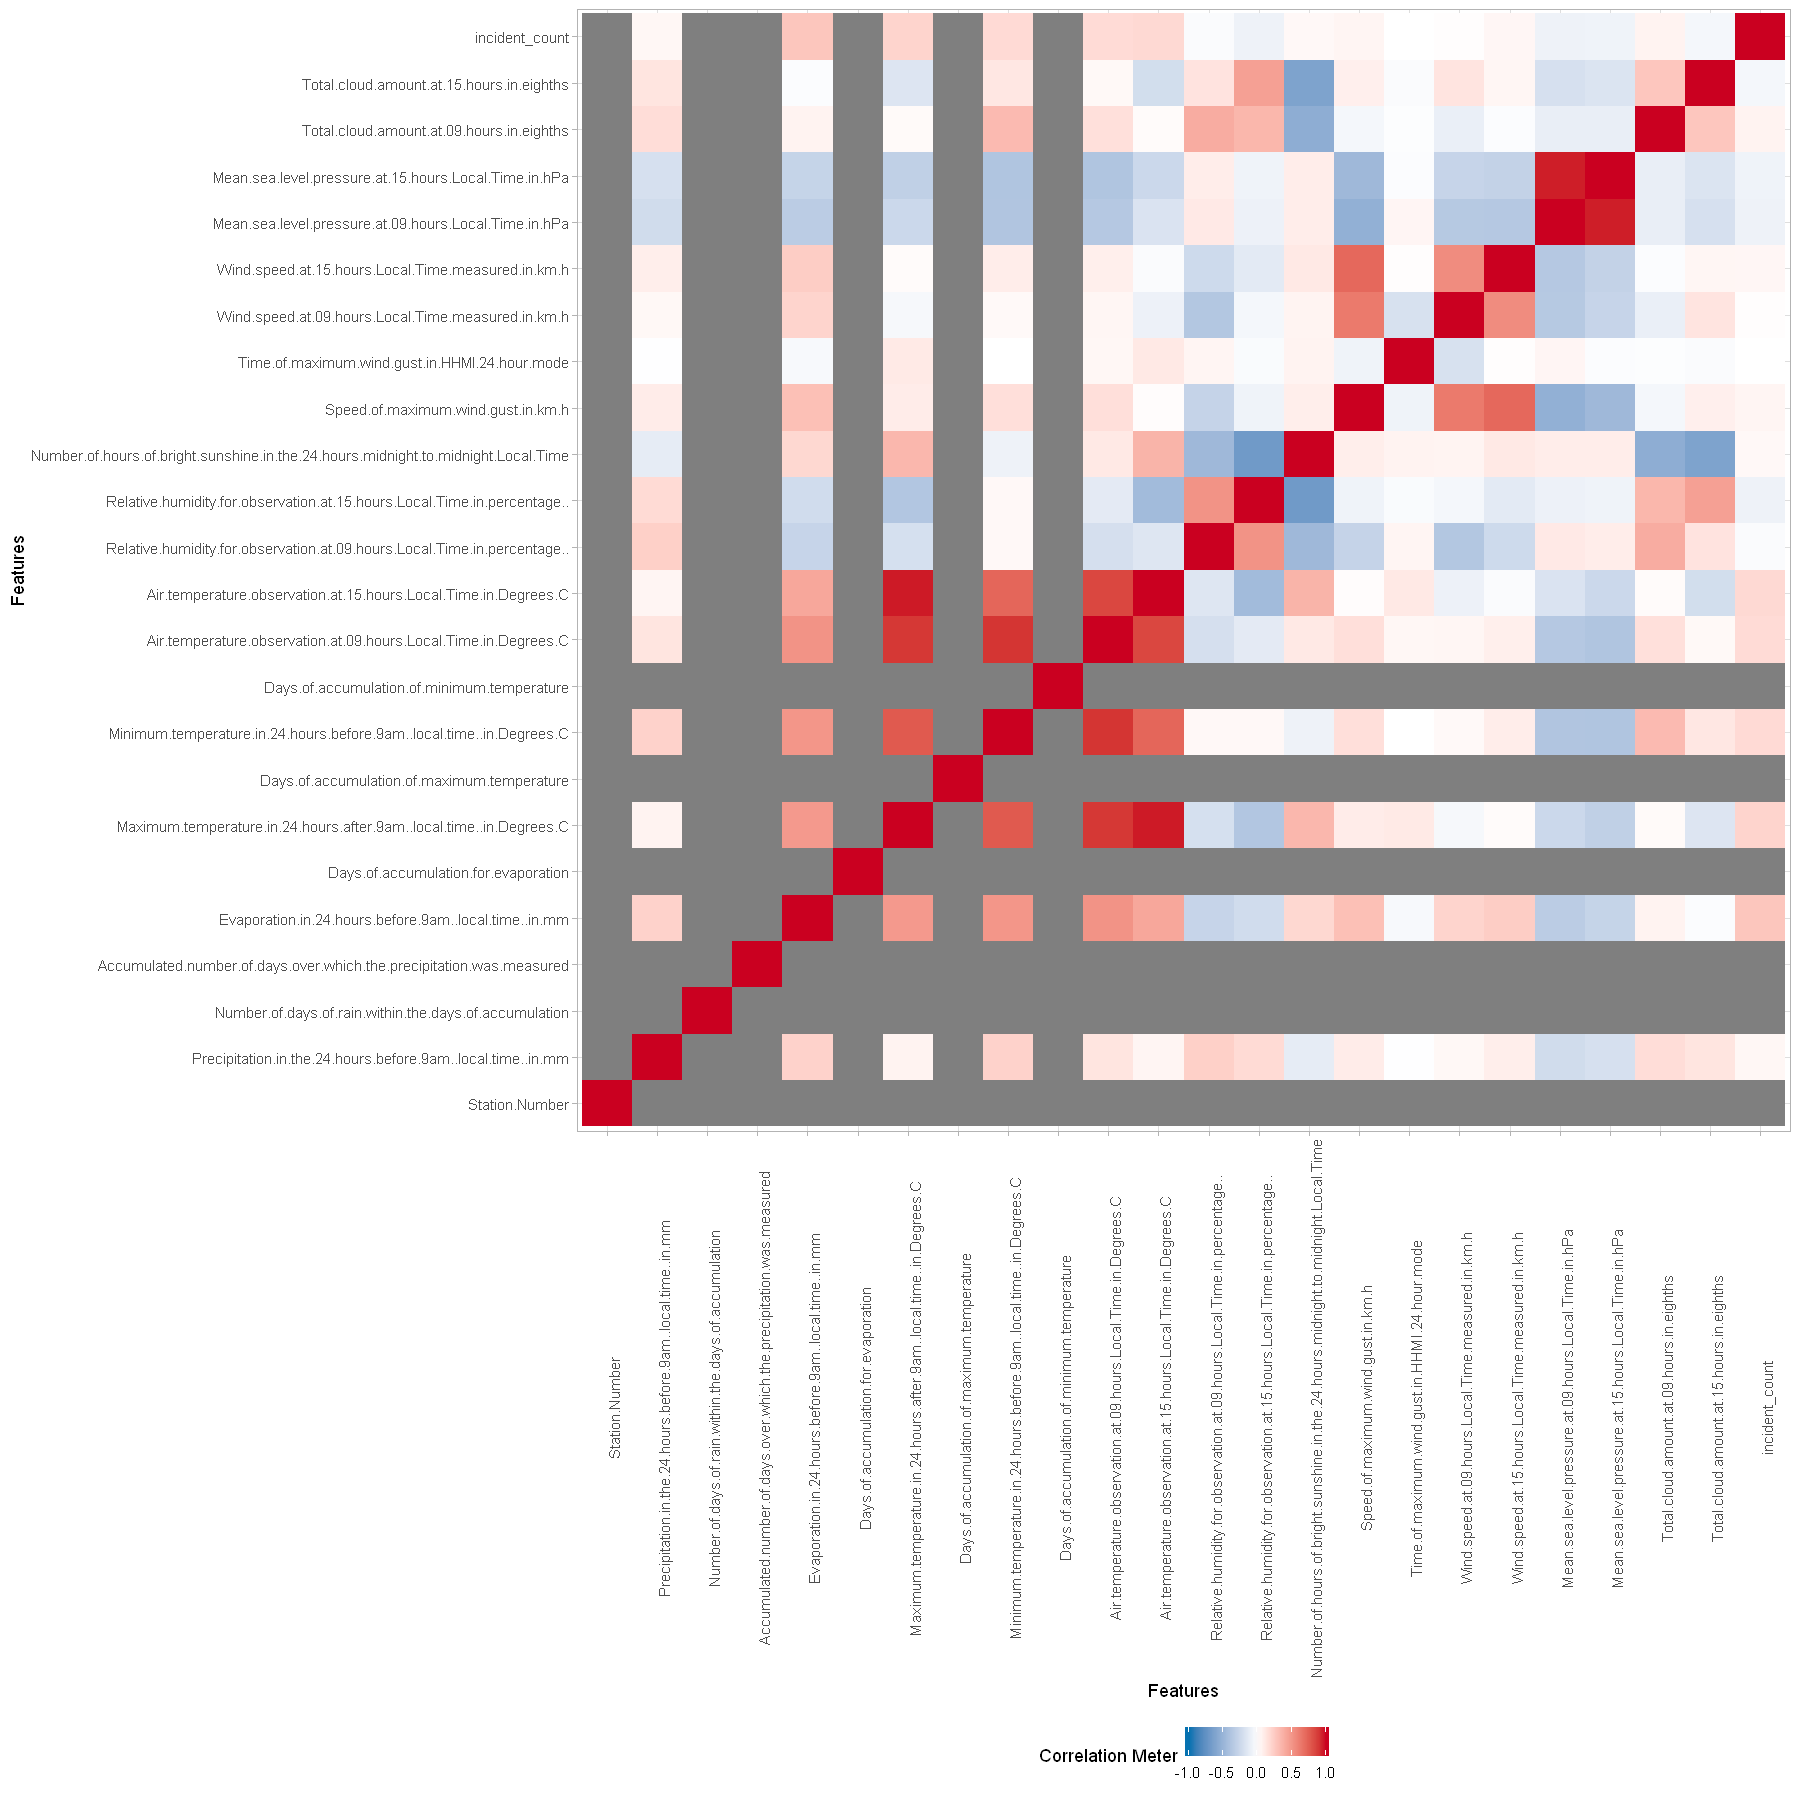

In [76]:
plot_correlation(na.omit(all_records), maxcat = 5L, ggtheme = theme_light())

## Demonstrate the correlation between different weather factors and the number of incident.  
We could specifically check for the correlation of the weather factors by looking at its column. Are there any factors positively or negatively correlated?

In [77]:
record_corr[,'incident_count']

Station.Number 
                                                                                NA 
                       Precipitation.in.the.24.hours.before.9am..local.time..in.mm 
                                                                       0.039760273 
                            Number.of.days.of.rain.within.the.days.of.accumulation 
                                                                                NA 
              Accumulated.number.of.days.over.which.the.precipitation.was.measured 
                                                                                NA 
                             Evaporation.in.24.hours.before.9am..local.time..in.mm 
                                                                       0.272223818 
                                              Days.of.accumulation.for.evaporation 
                                                                                NA 
               Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C 
                                                                       0.203676969 
                                       Days.of.accumulation.of.maximum.temperature 
                                                                                NA 
              Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C 
                                                                       0.173147989 
                                       Days.of.accumulation.of.minimum.temperature 
                                                                                NA 
                   Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C 
                                                                       0.168478311 
                   Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C 
                                                                       0.180139721 
          Relative.humidity.for.observation.at.09.hours.Local.Time.in.percentage.. 
                                                                      -0.023141919 
          Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage.. 
                                                                      -0.086505753 
Number.of.hours.of.bright.sunshine.in.the.24.hours.midnight.to.midnight.Local.Time 
                                                                       0.031613998 
                                                Speed.of.maximum.wind.gust.in.km.h 
                                                                       0.047736601 
                                    Time.of.maximum.wind.gust.in.HHMI.24.hour.mode 
                                                                       0.001921384 
                                Wind.speed.at.09.hours.Local.Time.measured.in.km.h 
                                                                       0.007646111 
                                Wind.speed.at.15.hours.Local.Time.measured.in.km.h 
                                                                       0.041530864 
                             Mean.sea.level.pressure.at.09.hours.Local.Time.in.hPa 
                                                                      -0.082857794 
                             Mean.sea.level.pressure.at.15.hours.Local.Time.in.hPa 
                                                                      -0.077758358 
                                         Total.cloud.amount.at.09.hours.in.eighths 
                                                                       0.057950844 
                                         Total.cloud.amount.at.15.hours.in.eighths 
                                                                      -0.053472246 
                                                                    incident_count 
                                                                                NA

We can see that some columns presented <NA> in the correlation coefficients. This is because the values of this column do not vary from incident_count to incident_count. 

As an example, most values of the columns are either <NA> or 1, so it doesn't really define any relationship with the incident_count.

In [78]:
unique(all_records$'Station.Number')
unique(all_records$'Number.of.days.of.rain.within.the.days.of.accumulation')
unique(all_records$'Accumulated.number.of.days.over.which.the.precipitation.was.measured')
unique(all_records$'Days.of.accumulation.for.evaporation')
unique(all_records$'Days.of.accumulation.of.maximum.temperature')
unique(all_records$'Days.of.accumulation.of.minimum.temperature')

[1] 77094 79100 81125 85280 86282 90186

[1] NA  1

[1]  1 NA

[1] NA  1

[1]  1 NA

[1]  1 NA

Based from the values above, the weather factors show a very weak linear correlation with the incident_count. The highest correlation coefficient, **Evaporation.in.24.hours.before.9am..local.time..in.mm**, is only at 0.27, while the lowest correlation coefficient, **Relative.humidity.for.observation.at.15.hours.Local.Time.in.percentage..** is only at 0.08.

Here's an R code to better filter the weather factors based on its correlation coefficients.

In [79]:
which(record_corr[,'incident_count'] > 0.30)
which(record_corr[,'incident_count'] < -0.30)

named integer(0)

named integer(0)

Warning message:
"Removed 15280 rows containing missing values (geom_point)."

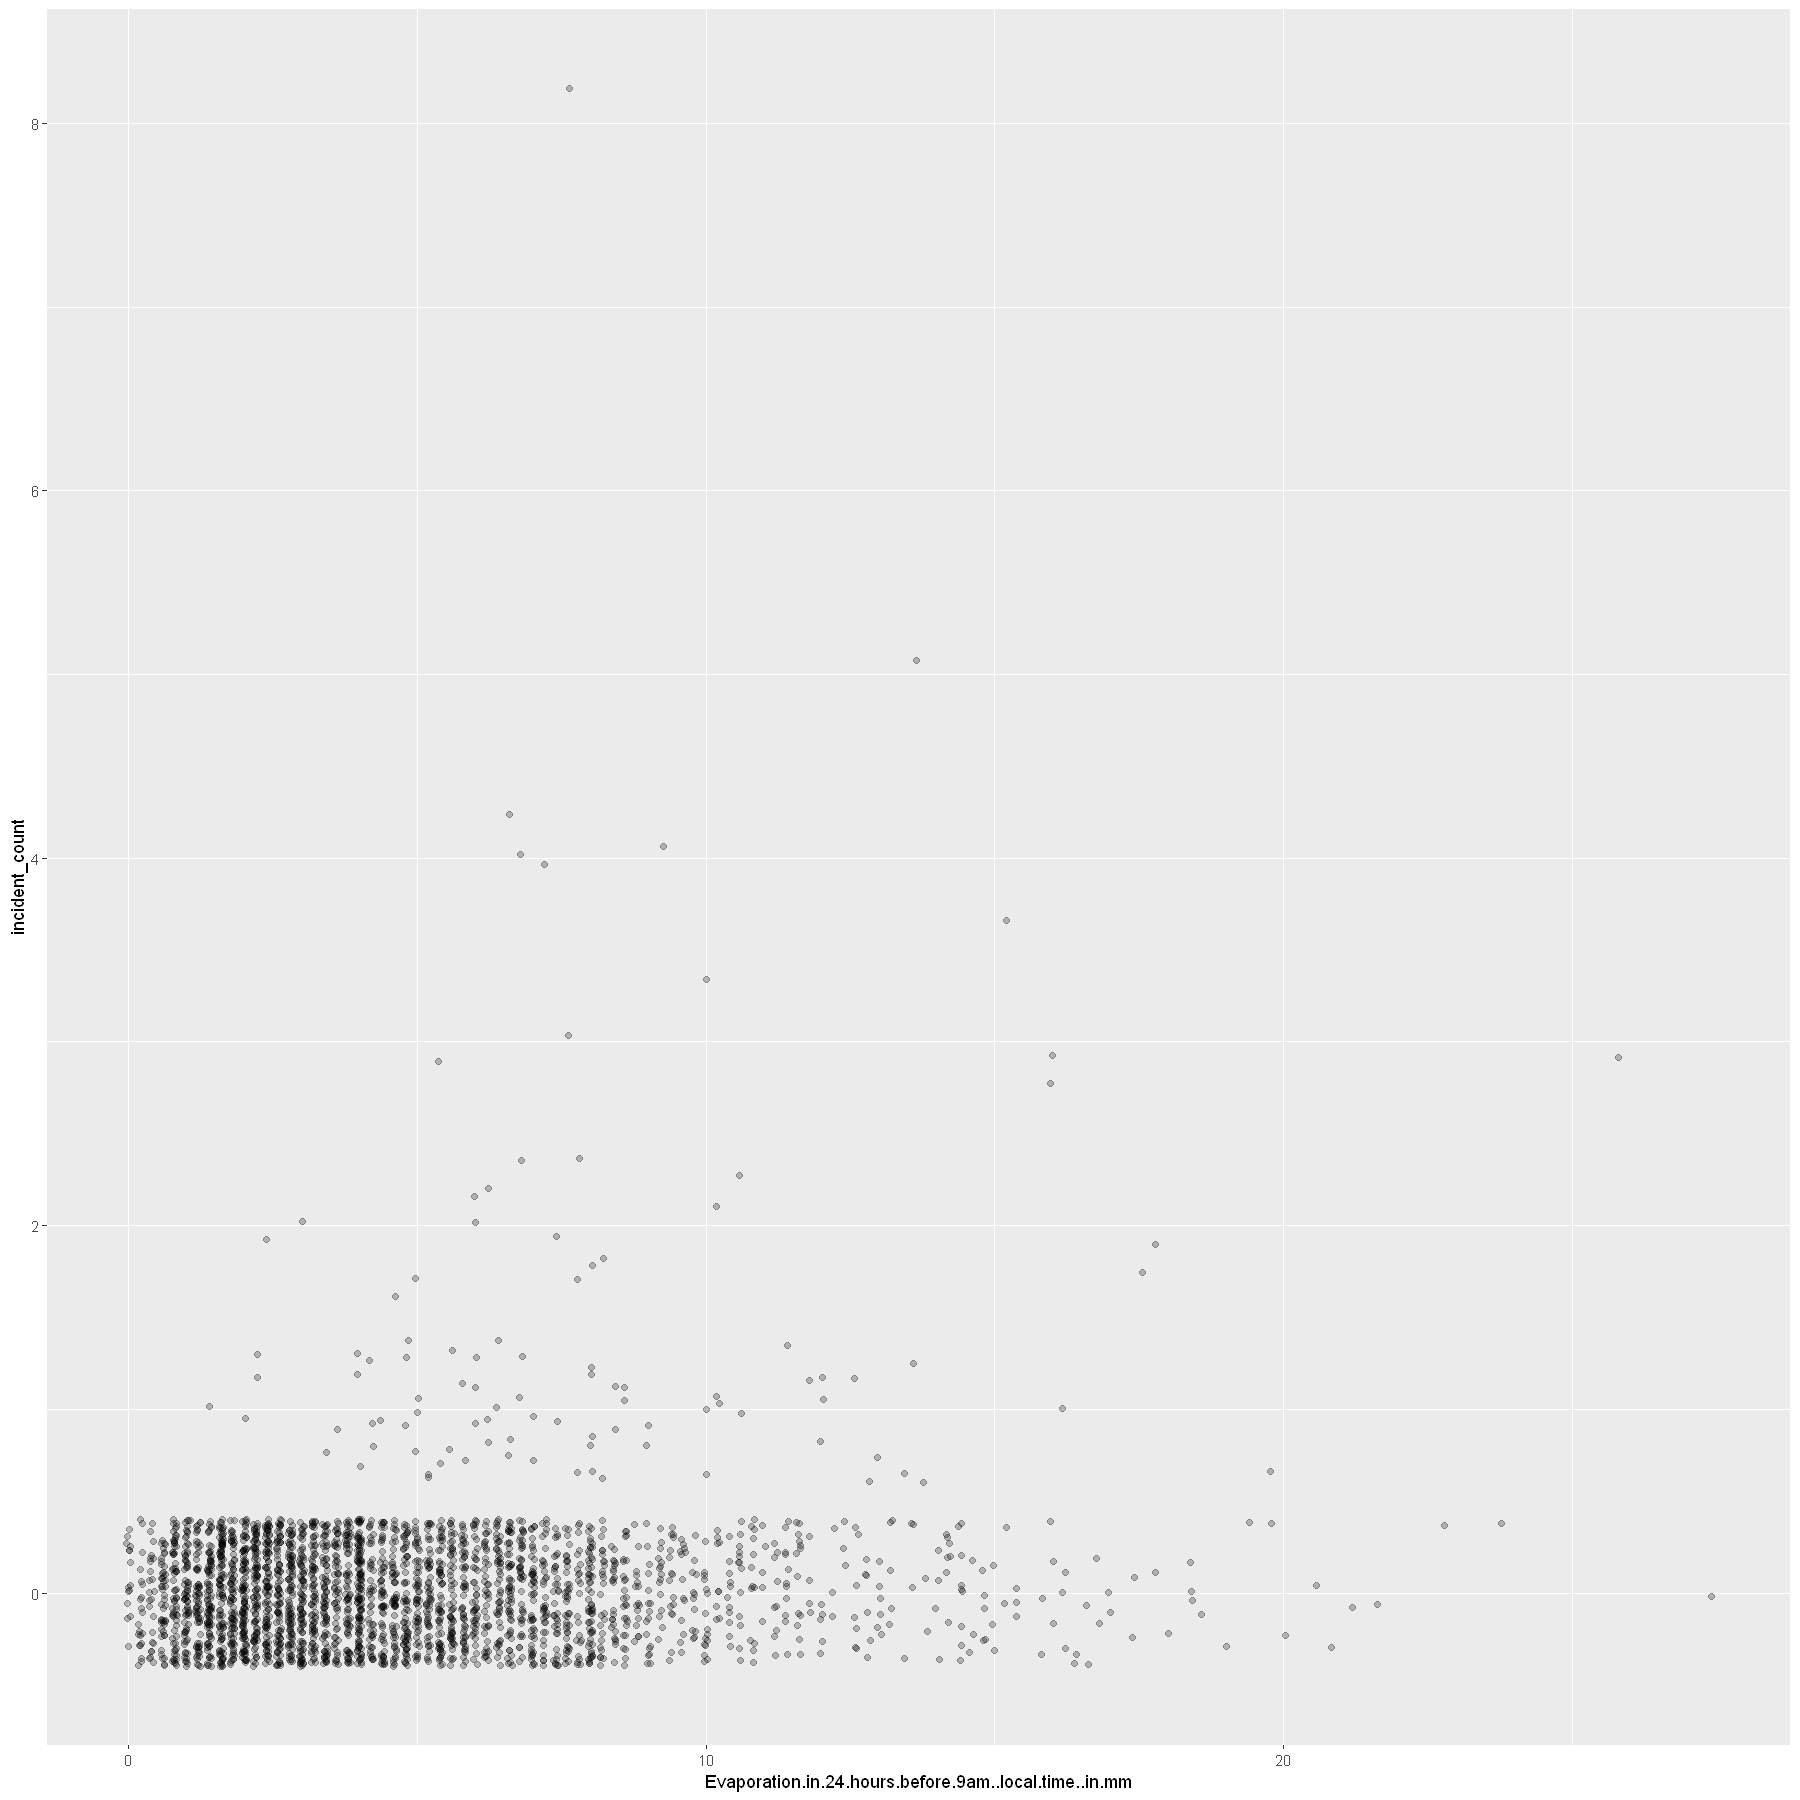

In [80]:
ggplot(aes(x = Evaporation.in.24.hours.before.9am..local.time..in.mm, y = incident_count), data = all_records) + 
    geom_point(alpha=1/4, position = 'jitter') 

In [81]:
which(record_corr[,'incident_count'] < -0.30)

named integer(0)

# Question 3
## Build a simple model to predict the number of incidents in 2018 and present the findings.

In this question, I decided to write a simple linear regression model. 

To recap, a linear regression model takes the form

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + ... + \beta_nX_n + \epsilon
$$

Where $Y$ is the target variable,
<br/>$\beta_0$ is the intercept, 
<br/>$\beta_n$ is the slope with respect to feature $X_n$ that describes its relationship to the target variable, and
<br/>$\epsilon$ is the residual or the irreducible error.

The goal of linear regression is to estimate the regression coefficients $\beta_0, \beta_1, \beta_2, ..., \beta_n$ that minimises the residual sum of squares (RSS).

$$
RSS = \sum_{i=1}^{n}(y_i - y_\text{pred})^2
$$

Which just says that the coefficients must result to predicted $y$ values that are close to the actual $y$ values as possible.



In [86]:
# Further reomve factors that are irrelevant to the target variable
drop_columns <- c('Station.Number', 
                  'Number.of.days.of.rain.within.the.days.of.accumulation',
                  'Accumulated.number.of.days.over.which.the.precipitation.was.measured',
                  'Days.of.accumulation.for.evaporation',
                  'Days.of.accumulation.of.minimum.temperature',
                  'Days.of.accumulation.of.maximum.temperature')

all_records <- all_records[,!(names(all_records)%in% drop_columns)]

In [87]:
# Replace NA incident count with 0.
all_records$incident_count[is.na(all_records$incident_count)] <- 0

# Split data into training and test sets.
train.len <- nrow(all_records) * 0.80
train.index <- sample(1:nrow(all_records), train.len)
train <- all_records[train.index,]
test <- all_records[-train.index,]

# Check the length of the train and test sets.
nrow(train)
nrow(test)

[1] 14668

[1] 3668

In [88]:
# Check the summary to get the mean incident_count.
summary(train$incident_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.02073 0.00000 5.00000 

In [89]:
# Call R's lm() function from the generalised linear model (glm) library that creates a linear regression
lr_model <- lm(incident_count~., data = train)
summary(lr_model)


Call:
lm(formula = incident_count ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3261 -0.0821 -0.0345  0.0082  4.7983 

Coefficients:
                                                                                     Estimate
(Intercept)                                                                         8.689e-02
Precipitation.in.the.24.hours.before.9am..local.time..in.mm                         1.810e-04
Evaporation.in.24.hours.before.9am..local.time..in.mm                               4.412e-03
Maximum.temperature.in.24.hours.after.9am..local.time..in.Degrees.C                 5.192e-03
Minimum.temperature.in.24.hours.before.9am..local.time..in.Degrees.C               -7.492e-03
Air.temperature.observation.at.09.hours.Local.Time.in.Degrees.C                     3.931e-03
Air.temperature.observation.at.15.hours.Local.Time.in.Degrees.C                     4.704e-03
Relative.humidity.for.observation.at.09.hours.Local.Time.in.percentage..           -1

### Findings 

#### Is there a relationship between the weather data and the incident count?

To answer this, we can fit an initial linear regression model using all the features by calling the `lm()` function. The `lm()` function inputs the regression formula and the data, and outputs a resulting regression class whose contents can be seen by calling the `summary()` method.

To determine if the relationship exists, we need to look at the resulting **F-statistic's p-value**. This statistic tests the null hypothesis *"The feature vector $X$ and target variable $Y$ is independent of each other."* A low p-value (< 0.05) indicates that a relationship indeed exists.

Based on the **F-statistic's low p-value** (p < 0.05), there is somehow an evidence of relationship between the weather features and the resulting incident count. 

#### How strong is the relationship?

To check how strong the relationship is, we need to check about the resulting **residual standard error (RSE)**. RSE is an indicator of the average error that the model has from the true regression line. The RSE of the incident count is 0.04888 is  while the mean incident count is 0.02073, indicating a percentage error of around 200%. This very high percentage error implies that the features in the model show a weak relationship to the target variable.

Another good statistic for measuring the goodness of fit of the model is **$R^2$**, which explains how much of the variability in the incident count is explained by using all of these weather features. Based on the resulting value, the model explains only **~ 4% of the variability of the incident counts**, which is not at all robust.

#### Which feature seems to contribute more in predicting the incident count?

The **t-statistic** is computed to test the null hypothesis *"There is no relationship between incident_count $y$ and feature $x$"*. Looking at the **coefficients** of each feature and their resulting t-statistic p-value, only two of the features are significant: *Speed.of.maximum.wind.gust.in.km.h* and *Wind.speed.at.09.hours.Local.Time.measured.in.km.h*. 

#### Overall assessment of the model

Based on the low **$R^2$** and t-statistic p-values, the model seems to underfit the data. We can improve the model by filtering relevant features using stepwise selection, for instance. 

#### Testing the Model

To test the model, we can use the `predict()` function to predict the values of the testing set, and determine the accuracy using caret's `confusionMatrix()` function. However, due to time constraints and since this is not a very good model in the first place, I've decided to just skip this part.